# Single Ring

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil


In [4]:
def create_file_with_contents(file_path, contents):
    try:
        with open(file_path, 'w') as file:
            file.write(contents)
        print(f"File '{file_path}' created successfully with contents.")
    except Exception as e:
        print(f"Error: {e}")



for b in range(11):
    beta = b/10
    new_file_path = f'./zjob{beta}.sh'
    file_contents = f"""#!/bin/sh

#SBATCH -o output-%j.log
#SBATCH --time=72:00:00          # total run time limit (HH:MM:SS)
#SBATCH -c 40

python $F/ring.py . "worker_kwargs=[{{'circumference':250}}]" "n_workers=40" "n_rollouts_per_step=40" "warmup_steps=2000" "skip_stat_steps=5000" "horizon=5000" "global_reward=True" "n_steps=50" "alg='TRPO'" "use_critic=False" "gamma=0.9995" "beta={beta}"
"""

    create_file_with_contents(new_file_path, file_contents)
    for run in range(3):
        os.system(f'LLsub {new_file_path}')

File './zjob0.0.sh' created successfully with contents.
Submitted batch job 25351898
LLGrid: TXE1 (running slurm-wlm 23.02.7)
Submitted batch job 25351899
LLGrid: TXE1 (running slurm-wlm 23.02.7)
Submitted batch job 25351900
LLGrid: TXE1 (running slurm-wlm 23.02.7)
File './zjob0.1.sh' created successfully with contents.
Submitted batch job 25351901
LLGrid: TXE1 (running slurm-wlm 23.02.7)
Submitted batch job 25351903
LLGrid: TXE1 (running slurm-wlm 23.02.7)
Submitted batch job 25351904
LLGrid: TXE1 (running slurm-wlm 23.02.7)
File './zjob0.2.sh' created successfully with contents.
Submitted batch job 25351905
LLGrid: TXE1 (running slurm-wlm 23.02.7)
Submitted batch job 25351906
LLGrid: TXE1 (running slurm-wlm 23.02.7)
Submitted batch job 25351907
LLGrid: TXE1 (running slurm-wlm 23.02.7)
File './zjob0.3.sh' created successfully with contents.
Submitted batch job 25351908
LLGrid: TXE1 (running slurm-wlm 23.02.7)
Submitted batch job 25351909
LLGrid: TXE1 (running slurm-wlm 23.02.7)
Submit

In [6]:
files = {
      0 : [(25351898, 'gwwrydbv'), (25351899, 'cqaaqqlx'), (25351900, 'ydadevsy')],
    0.1 : [(25351901, 'npgyhrwr'), (25351903, 'azhlppad'), (25351904, 'ydpuhdgq')],
    0.2 : [(25351905, 'jusnunrk'), (25351906, 'dnsdbosa'), (25351907, 'jnjibibl')],
    0.3 : [(25351908, 'jornswor'), (25351909, 'hnqvmuqi'), (25351910, 'fhftugst')],
    0.4 : [(25351911, 'wrxxkydm'), (25351913, 'hyducava')], # (25351912, ''),
    0.5 : [(25351914, 'tcneldox'), (25351915, 'rjiyhika'), (25351916, 'ohbaaexe')],
    0.6 : [(25351917, 'ffwlpoqe'), (25351918, 'zqvggklk'), (25351919, 'vpqrmgaf')],
    0.7 : [(25351920, ''), (25351921, ''), (25351922, '')],
    0.8 : [(25351923, ''), (25351924, ''), (25351925, '')],
    0.9 : [(25351926, ''), (25351927, ''), (25351928, '')],
    1   : [(25351929, ''), (25351930, ''), (25351931, '')],
}

In [9]:

def ttc_mean_std(log_name):
    path = f'./{log_name}'
    means = []
    stds = []
    with open(path) as f:
        for line in f:
            if line[:5] == 'ttc m':
                num = float(line.split(' ')[-1])
                means += [num]
            elif line[:5] == 'ttc_s':
                num = float(line.split(' ')[-1])
                stds += [num]
    return np.array(means), np.array(stds)

def rl_speed_mean_std(dir_name):
    path = f'./tmp/{dir_name}/train_results.csv'
    df = pd.read_csv(path)
    return df['speed_rl'].to_numpy(), df['speed_rl_std'].to_numpy()

In [8]:
colors=['brown', 'red', 'orange', 'gold', 'lightgreen', 'forestgreen', 'paleturquoise', 'deepskyblue', 'blue', 'darkorchid', 'violet']

# plot reward graph
def speed_ttc_training_rewards(runs):
    avg_ttc_y, avg_ttc_e = [], []
    avg_speed_y, avg_speed_e = [], []
    for i in range(len(runs)):
        run = runs[i]
        log, tmp_dir = f'output-{run[0]}.log', run[1]
        ttc_y, ttc_e = ttc_mean_std(log)
        avg_ttc_y += [ttc_y]
        avg_ttc_e += [ttc_e]
        speed_y, speed_e = rl_speed_mean_std(tmp_dir)
        avg_speed_y += [speed_y]
        avg_speed_e += [speed_e]
    avg_ttc_y = np.mean(np.stack(avg_ttc_y), axis=0)
    avg_ttc_e = np.mean(np.stack(avg_ttc_e), axis=0)
    avg_speed_y = np.mean(np.stack(avg_speed_y), axis=0)
    avg_speed_e = np.mean(np.stack(avg_speed_e), axis=0)
    
    return avg_ttc_y, avg_speed_y, avg_ttc_e, avg_speed_e

In [ ]:
x = np.arange(51)
fig, axs = plt.subplots(2, sharey=True)

for b in range(11):
    beta = b/10
    if not beta in files.keys():
        continue
    avg_ttc_y, avg_speed_y, avg_ttc_e, avg_speed_e = speed_ttc_training_rewards(files[beta])
    
    axs[0].plot(x, avg_ttc_y/7, color=colors[b], label=f'{beta} ttc')
    axs[1].plot(x, avg_speed_y/10, color=colors[b], label=f'{beta}')
    
axs[0].set_ylabel('avg ttc')
axs[1].set_ylabel('avg speed')
plt.suptitle('average ttc/speed rewards during training')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
# evals setup
import os
import shutil

for i in range(11):
    b = i/10
    os.mkdir(f'./tmp/{files[b][0][1]}/evaluations')
    os.mkdir(f'./tmp/{files[b][0][1]}/trajectories')
    new_file_path = f'./tmp/{files[b][0][1]}/eval_commands.sh'
    shutil.copy('./eval_commands.sh', new_file_path)
    os.system(f'LLsub {new_file_path}')

In [ ]:
# do evals
# plot pareto graph

evals = {
      0 : ,
    0.1 : ,
    0.2 : , 
    0.3 : ,
    0.4 : ,
    0.5 : ,
    0.6 : , 
    0.7 : ,
    0.8 : ,
    0.9 : ,
    1   : , 
}


def ttc_eval_rewards(beta):
    log = f'tmp/{files[beta][0][1]}/output-{evals[beta]}.log'
    ttc_y, ttc_e = ttc_mean_std(log)
    avg_ttc_y = np.mean(np.array(ttc_y))
    
    return avg_ttc_y/7

def speed_eval_rewards(beta):
    speed_csv = pd.read_csv(f'./tmp/{files[beta][0][1]}/evaluations/test.csv')
    return np.mean(speed_csv['speed_rl'])

for i in range(11):
    beta = i/10
    if beta not in evals:
        continue
    p = (ttc_eval_rewards(beta), speed_eval_rewards(beta))
    plt.plot(*p, marker='o', color=colors[i])
    plt.annotate(f'  {beta}', p)

plt.xlabel('ttc')
plt.ylabel('avg speed_rl')
plt.title('eval ttc vs speed')
plt.show()

In [12]:
# all log ttc divided by 7 here, warmup0

betas = {
      0 : [(25304848, 'clhrkaix')],
    0.1 : [(25304854, 'jdtadvlj')],
    0.2 : [(25304855, 'jeichopr')],
    0.3 : [(25304860, 'tjgsbnep')],
    0.4 : [(25305812, 'fndbtywr')],
    0.5 : [(25304877, 'cffsfbxs')],
    0.6 : [(25305820, 'ymzrcdoq')],
    0.7 : [(25305829, 'rbgdmava')],
    0.8 : [(25305830, 'vmjkxwke')],
    0.9 : [(25305817, 'fpjocvxj')],
    1   : [(25304883, 'vtiqphnd'), (25305798, 'equykqac')],
}
### 0.75: 25304880 





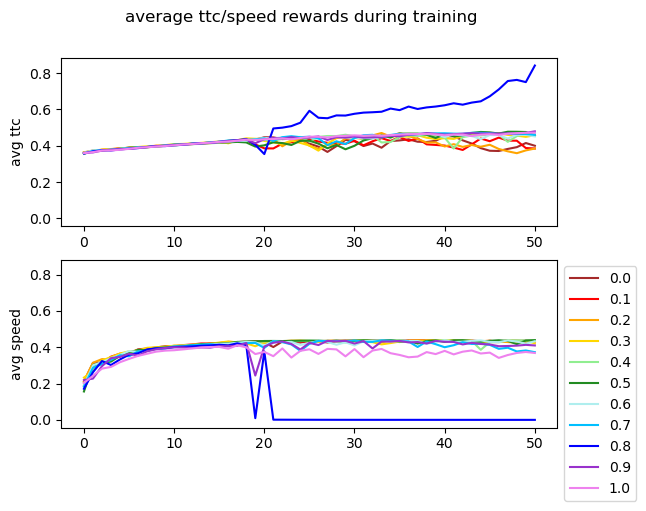

In [42]:
x = np.arange(51)
colors=['brown', 'red', 'orange', 'gold', 'lightgreen', 'forestgreen', 'paleturquoise', 'deepskyblue', 'blue', 'darkorchid', 'violet']

fig, axs = plt.subplots(2, sharey=True)

for b in range(11):
    beta = b/10
    if not beta in betas.keys():
        continue
    avg_ttc_y, avg_speed_y, avg_ttc_e, avg_speed_e = speed_ttc_training_rewards(betas[beta])
    
    axs[0].plot(x, avg_ttc_y/7, color=colors[b], label=f'{beta} ttc')
    axs[1].plot(x, avg_speed_y/10, color=colors[b], label=f'{beta}')
    
axs[0].set_ylabel('avg ttc')
axs[1].set_ylabel('avg speed')
plt.suptitle('average ttc/speed rewards during training')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [43]:
# evals setup
import os
import shutil

for i in range(11):
    b = i/10
    os.mkdir(f'./automatic_vehicular_control/tmp/{betas[b][0][1]}/evaluations')
    os.mkdir(f'./automatic_vehicular_control/tmp/{betas[b][0][1]}/trajectories')
    shutil.copy('automatic_vehicular_control/eval_commands.sh', f'./automatic_vehicular_control/tmp/{betas[b][0][1]}/eval_commands.sh')
    
    

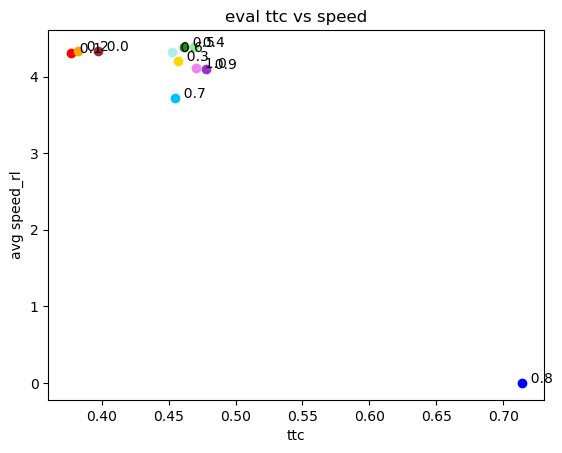

In [13]:
# do evals
# plot pareto graph

evals = {
      0 : 25307101,
    0.1 : 25307105,
    0.2 : 25307108, 
    0.3 : 25307109,
    0.4 : 25307110,
    0.5 : 25307114,
    0.6 : 25307118, 
    0.7 : 25307120,
    0.8 : 25307123,
    0.9 : 25307125,
    1   : 25307127, #vtiqphnd
}


def ttc_eval_rewards(beta):
    log = f'tmp/{betas[beta][0][1]}/output-{evals[beta]}.log'
    ttc_y, ttc_e = ttc_mean_std(log)
    avg_ttc_y = np.mean(np.array(ttc_y))
    
    return avg_ttc_y/7

def speed_eval_rewards(beta):
    speed_csv = pd.read_csv(f'./automatic_vehicular_control/tmp/{betas[beta][0][1]}/evaluations/test.csv')
    return np.mean(speed_csv['speed_rl'])

for i in range(11):
    beta = i/10
    if beta not in evals:
        continue
    p = (ttc_eval_rewards(beta), speed_eval_rewards(beta))
    plt.plot(*p, marker='o', color=colors[i])
    plt.annotate(f'  {beta}', p)

plt.xlabel('ttc')
plt.ylabel('avg speed_rl')
plt.title('eval ttc vs speed')
plt.show()

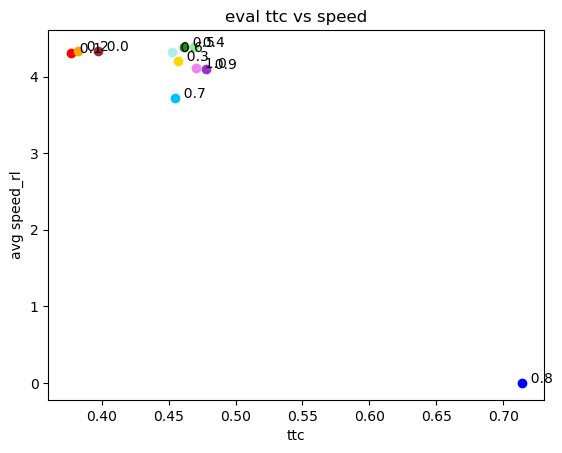

In [13]:
# do evals
# plot pareto graph

evals = {
      0 : 25307101,
    0.1 : 25307105,
    0.2 : 25307108, 
    0.3 : 25307109,
    0.4 : 25307110,
    0.5 : 25307114,
    0.6 : 25307118, 
    0.7 : 25307120,
    0.8 : 25307123,
    0.9 : 25307125,
    1   : 25307127, #vtiqphnd
}


def ttc_eval_rewards(beta):
    log = f'tmp/{betas[beta][0][1]}/output-{evals[beta]}.log'
    ttc_y, ttc_e = ttc_mean_std(log)
    avg_ttc_y = np.mean(np.array(ttc_y))
    
    return avg_ttc_y/7

def speed_eval_rewards(beta):
    speed_csv = pd.read_csv(f'./automatic_vehicular_control/tmp/{betas[beta][0][1]}/evaluations/test.csv')
    return np.mean(speed_csv['speed_rl'])

for i in range(11):
    beta = i/10
    if beta not in evals:
        continue
    p = (ttc_eval_rewards(beta), speed_eval_rewards(beta))
    plt.plot(*p, marker='o', color=colors[i])
    plt.annotate(f'  {beta}', p)

plt.xlabel('ttc')
plt.ylabel('avg speed_rl')
plt.title('eval ttc vs speed')
plt.show()

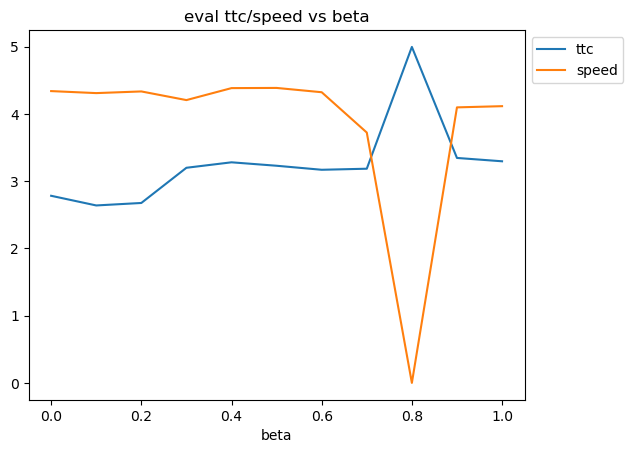

In [17]:
ttc_per_beta, speed_per_beta = [], []

for i in range(11):
    beta = i/10
    if beta not in evals:
        continue
    ttc_per_beta += [ttc_eval_rewards(beta)]
    speed_per_beta += [speed_eval_rewards(beta)]

x_beta = np.arange(0, 1.1, 0.1)

plt.plot(x_beta, [7*x for x in ttc_per_beta], label='ttc')
plt.plot(x_beta, speed_per_beta, label='speed')
plt.xlabel('beta')
plt.title('eval ttc/speed vs beta')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


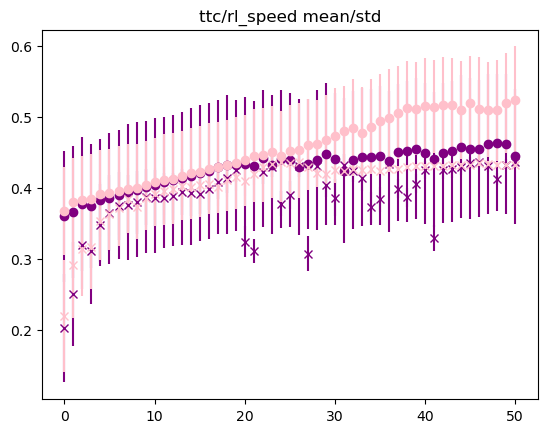

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# ttc normalized by log & divide by 7
# forced beta=1 (removed speed term altogether)
beta1 = ('output-25303821.log', 'fcefmxhi')

# warmup=0
warm0 = ('output-25303816.log', 'biggzosk')

warm0_ttc_y, warm0_ttc_e = ttc_mean_std(warm0[0])  
warm0_speed_y, warm0_speed_e = rl_speed_mean_std(warm0[1])

plt.errorbar(x, warm0_ttc_y/7, warm0_ttc_e/7, linestyle='None', marker='o', color='purple')
plt.errorbar(x, warm0_speed_y/10, warm0_speed_e/10, linestyle='None', marker='x', color='purple')

beta1_ttc_y, beta1_ttc_e = ttc_mean_std(beta1[0])  
beta1_speed_y, beta1_speed_e = rl_speed_mean_std(beta1[1])

plt.errorbar(x, beta1_ttc_y/7, beta1_ttc_e/7, linestyle='None', marker='o', color='pink')
plt.errorbar(x, beta1_speed_y/10, beta1_speed_e/10, linestyle='None', marker='x', color='pink')

plt.title('ttc/rl_speed mean/std')
plt.show()

# purple = warm0 + 0.99 beta, pink = forced beta=1
# both log ttc divided by 7 

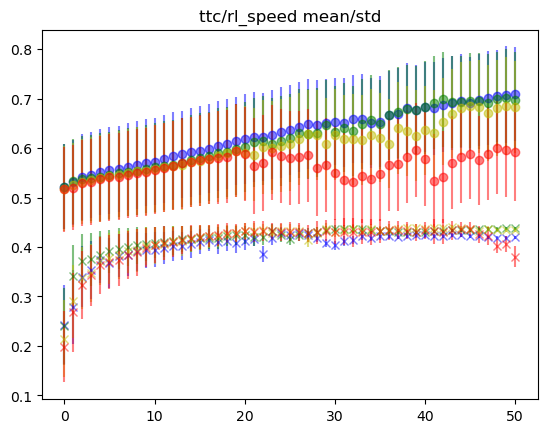

In [7]:


# ttc not normalized
# beta0_99 = [('output-25251701.log', 'ducpjziz'), ('output-25251741.log', 'olryuhzv'), ('output-25251863.log', 'ienhiwkw') ]
# beta0_5 = [('output-25251946.log', 'mokjwfji'), ('output-25252053.log', 'hlnirfmk'), ('output-25252378.log', 'ntqlfiax') ]
# beta0 = [('output-25252057.log', 'rrujtrbj'), ('output-25252060.log', 'abehpgzr'), ('output-25252062.log', 'utoglpry') ]

beta0_99 = [('output-25271423.log', 'wptrxqsa'), ('output-25272241.log', 'altayldz'), ('output-25272242.log', 'foqkqtse')]
beta0_5 = [('output-25272243.log', 'puodlafo'), ('output-25272244.log', 'lvmdqrox'), ('output-25272245.log', 'alftbqzb')]
# beta0 = [('output-25272266.log', 'akzmkdvg'), ('output-25272267.log', 'chtobqtl'), ('output-25272268.log', 'lwserxan')]

# 0.2 25276290 ,1, 2
# check avg velocity for beta0, 0.99
# measure frequency of if/else for each 0, 10, ...50 model 0.99 path
beta0_2 = [('output-25276291.log', 'wflxbspf'), ('output-25276290.log', 'naygygre')]
# 0.2 value printing a lot ?? ('output-25276292.log', ''),

# rerunning 
beta0=[('output-25274851.log', 'vdqzgkat'), ('output-25274852.log', 'rpnfcvlt'), ('output-25274853.log', 'ctsiovro')]

# need to plot for each beta:
#  ttcmean+std for each run
#  speed mean/std for each run

beta_nums = [0.99, 0.5, 0.2, 0]
beta_runs = [beta0_99, beta0_5,beta0_2, beta0]

x = np.arange(51)
    
for j in range(len(beta_runs)):
    b = beta_runs[j]
    colors=['b', 'g', 'y', 'r']

    avg_ttc_y, avg_ttc_e = [], []
    avg_speed_y, avg_speed_e = [], []
    for i in range(len(b)):
        run = b[i]
        ttc_y, ttc_e = ttc_mean_std(run[0])
        avg_ttc_y += [ttc_y]
        avg_ttc_e += [ttc_e]
        
        speed_y, speed_e = rl_speed_mean_std(run[1])
        avg_speed_y += [speed_y]
        avg_speed_e += [speed_e]
    
    avg_ttc_y = np.mean(np.stack(avg_ttc_y), axis=0)
    avg_ttc_e = np.mean(np.stack(avg_ttc_e), axis=0)
    avg_speed_y = np.mean(np.stack(avg_speed_y), axis=0)
    avg_speed_e = np.mean(np.stack(avg_speed_e), axis=0)
    
    plt.errorbar(x, avg_ttc_y/5, avg_ttc_e/5, linestyle='None', marker='o', color=colors[j], alpha=0.5)
    # ttc_line.set_label(f'{j} ttc')
    plt.errorbar(x, avg_speed_y/10, avg_speed_e/10, linestyle='None', marker='x', color=colors[j], alpha=0.5)
    # speed_line.set_label(f'{j} speed')
    

    
plt.title('ttc/rl_speed mean/std')
# plt.legend()
plt.show()

# r = 0, y = 0.2, g = 0.5, b = 0.99
#reward = (1-beta)*reward/max_speed + beta*ttc/5


In [15]:
# measure frequency of if/else for each 0, 10, ...50 model 0.99 path in wptrxqsa
# check number of ttc violations, maybe 0.5 ~= 0.99
def ifs_else_freq(log_number, tmp_dir):
    path=f'./automatic_vehicular_control/tmp/{tmp_dir}/output-{log_number}.log'
    ifs, elses = 0, 0
    with open(path) as f:
        for line in f:
            if line[:5] == 'if184':
                ifs += 1
            elif line[:5] == 'else1':
                elses += 1
    return ifs, elses


def count_ifs_elses(logs, tmp_dir):
    ifs = []
    elses = []
    for i in range(6):
        step = (i+1)*10
        if_num, else_num = ifs_else_freq(logs[i], tmp_dir)
        ifs += [if_num]
        elses += [else_num]
    return ifs, elses
    


In [16]:
# logs for 0, 10, 20, 30, 40, 50
logs0_99 = [25277007, 25276934, 25277010, 25277013, 25277014, 25277015]
tmp_dir0_99 = 'wptrxqsa'
ifs0_99, elses0_99 = count_ifs_elses(logs0_99, tmp_dir0_99)

In [17]:
logs0 = [25277706, 25277709, 25277712, 25277715, 25277721, 25277723]
tmp_dir0 = 'vdqzgkat'
ifs0, elses0 = count_ifs_elses(logs0, tmp_dir0)

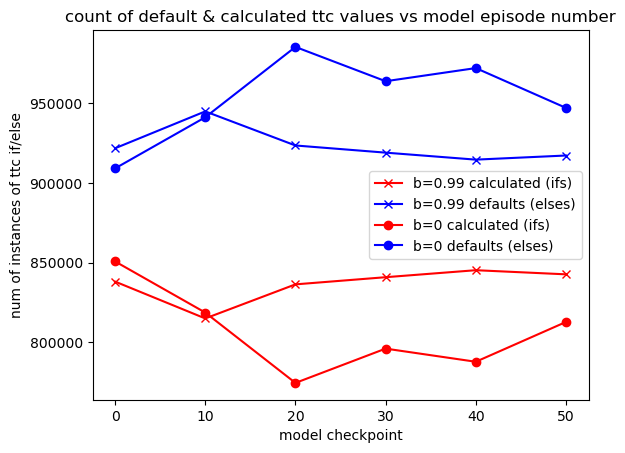

In [18]:
x = list(range(0, 60, 10))
plt.plot(x, ifs0_99, label='b=0.99 calculated (ifs)', color='r', marker='x')
plt.plot(x, elses0_99, label='b=0.99 defaults (elses)', color='b', marker='x')
plt.plot(x, ifs0, label='b=0 calculated (ifs)', color='r', marker='o')
plt.plot(x, elses0, label='b=0 defaults (elses)', color='b', marker='o')

plt.xlabel('model checkpoint')
plt.ylabel('num of instances of ttc if/else')
plt.title('count of default & calculated ttc values vs model episode number')
plt.legend()
plt.show()

In [22]:
# average speed of all vehicles over all testing steps. testing done on checkpt 50

print('avg speed of all vehicles over all steps during evaluation of ckpt 50')
speed0_99 = pd.read_csv(f'./automatic_vehicular_control/tmp/wptrxqsa/evaluations/test0.99.50.csv')
print(np.mean(speed0_99['speed_rl']), 'beta=0.99')

speed0 = pd.read_csv(f'./automatic_vehicular_control/tmp/vdqzgkat/evaluations/test0.50.csv')
print(np.mean(speed0['speed_rl']), 'beta=0')

avg speed of all vehicles over all steps during evaluation of ckpt 50
4.1907859716731535 beta=0.99
4.374412614412391 beta=0


In [ ]:
# new pareto plot with new normalization scheme

beta0_99 = [('output-25271423.log', 'wptrxqsa'), ('output-25272241.log', 'altayldz'), ('output-25272242.log', 'foqkqtse')]
beta0_5 = [('output-25272243.log', 'puodlafo'), ('output-25272244.log', 'lvmdqrox'), ('output-25272245.log', 'alftbqzb')]
beta0_2 = [('output-25276291.log', 'wflxbspf'), ('output-25276290.log', 'naygygre')]
beta0=[('output-25274851.log', 'vdqzgkat'), ('output-25274852.log', 'rpnfcvlt'), ('output-25274853.log', 'ctsiovro')]

b_lists = [beta0, beta0_2, beta0_5, beta0_99]
betas = [0, 0.2, 0.5, 0.99]

def avg_eval_speed(tmp_dir, beta):
    speed_col = pd.read_csv(f'./automatic_vehicular_control/tmp/{tmp_dir}/evaluations/test.csv')

for i in range(len()):
    b = b_lists[i]
    beta = betas[i]
    for _, tmp_dir in b:
        

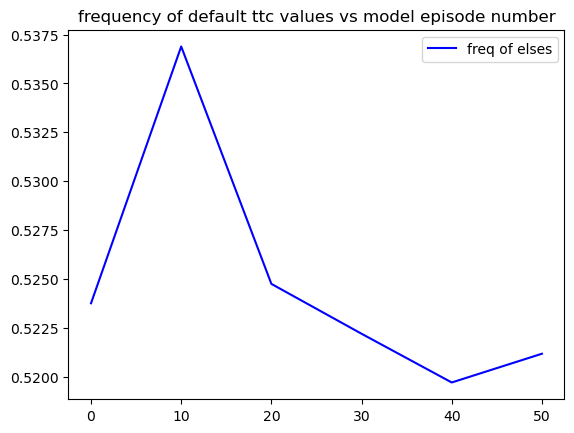

In [12]:
plt.plot(x, [elses[i]/(ifs[i]+elses[i]) for i in range(len(elses))], label='freq of elses', color='b')
plt.title('frequency of default ttc values vs model episode number')
plt.legend()
plt.show()

In [2]:
def ttc_stats(log_path):
    valid_ttc_count, valid_ttc_sum, invalid_ttc_count = 0, 0, 0
    with open(log_path) as f:
        for line in f:
            if line[:5] == 'ttc v':
                ttc = float(line.split(' ')[5])
                valid_ttc_count += 1
                valid_ttc_sum += ttc
            elif line[:5] == 'ttc i':
                invalid_ttc_count += 1
    return valid_ttc_count, valid_ttc_sum, invalid_ttc_count

In [6]:
valid_count, valid_sum, invalid = ttc_stats('./automatic_vehicular_control/tmp/stqbimeu/output-25061436.log')

In [8]:
print(valid_count, valid_sum, invalid)
print(valid_sum/valid_count)
# ttc stats from eval results of zee's code no ttc calls

817982 7.731667362975174e+17 942018
945212408460.721


In [8]:
valid_count, valid_sum, invalid = ttc_stats('./automatic_vehicular_control/tmp/esfsddjm/output-25171652.log')
print(valid_count, valid_sum, invalid)
print(valid_sum/valid_count)
#0

895746 8.620814660503013e+17 864254
962417321484.3285


In [4]:
# valid_count, valid_sum, invalid = ttc_stats('./automatic_vehicular_control/tmp/hpmtzunc/output-25074985.log') this is incorrect train reward scheme

valid_count, valid_sum, invalid = ttc_stats('./automatic_vehicular_control/tmp/ywuofqon/output-25167468.log')
print(valid_count, valid_sum, invalid)
print(valid_sum/valid_count)
#0.5

285495 7.626280947450886e+17 1474505
2671248514842.952


In [3]:
# valid_count, valid_sum, invalid = ttc_stats('./automatic_vehicular_control/tmp/lmseyrtr/output-25077766.log') this is incorrect train reward scheme

valid_count, valid_sum, invalid = ttc_stats('./automatic_vehicular_control/tmp/absgycun/output-25167317.log')
print(valid_count, valid_sum, invalid)
print(valid_sum/valid_count)
#0.99

628518 7.523810445905834e+17 1131482
1197071594752.391


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

speed_0 = pd.read_csv('./automatic_vehicular_control/tmp/esfsddjm/evaluations/test0.csv')
speed_0_5 = pd.read_csv('./automatic_vehicular_control/tmp/ywuofqon/evaluations/test0.5.csv')
speed_0_99 = pd.read_csv('./automatic_vehicular_control/tmp/absgycun/evaluations/test0.99.csv')

speed_0 = np.mean(speed_0['speed_rl'])
speed_0_5 = np.mean(speed_0_5['speed_rl'])
speed_0_99 = np.mean(speed_0_99['speed_rl'])
print(speed_0)
print(speed_0_5)
print(speed_0_99)

4.413121083629781
3.2212553396821026e-05
3.975957426722091


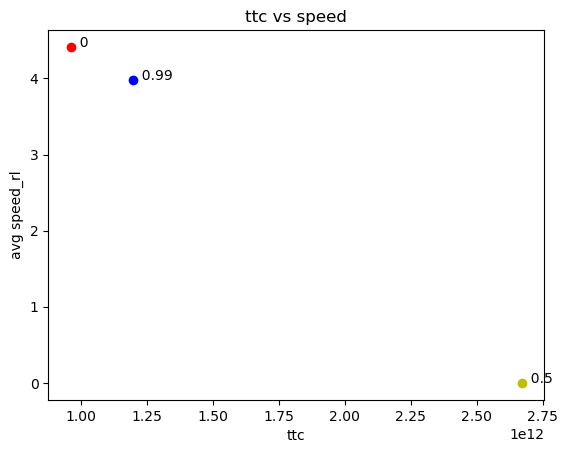

In [7]:
beta_zero = (962417321484.3285, speed_0)
beta_half = (2671248514842.952, speed_0_5)
beta_one = (1197071594752.391, speed_0_99)

plt.annotate('  0', beta_zero)
plt.annotate('  0.5', beta_half)
plt.annotate('  0.99', beta_one)

plt.plot(*beta_zero, 'ro')
plt.plot(*beta_half, 'yo')
plt.plot(*beta_one, 'bo')

plt.xlabel('ttc')
plt.ylabel('avg speed_rl')
plt.title('ttc vs speed')
plt.show()

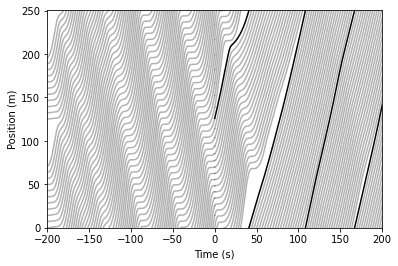

In [45]:
circ = 250
sim_step = 0.1
warmup_steps = 2000
label = 'Ours (DRL, Global)'

plt.figure(figsize=(6, 4))
path = traj_paths[label, circ]
xml = E.from_path(path.replace('.npz', '.net.xml'))
lanes = {e[0].id: Namespace(**e[0]) for e in xml if e._name == 'edge'}

df = cache[label, circ][0]
df.id = df.id.astype(int)
lane_order = [':bottom_0_0', 'right_0', ':top_0_0', 'left_0']
lane_lengths = [float(lanes[k].length) for k in lane_order]
total_length = sum(lane_lengths)
pos_offset = dict(zip(lane_order, np.cumsum(lane_lengths) - lane_lengths))
df['is_warmup'] = df.step < warmup_steps
for (id, is_warmup), vehs in df.groupby(['id', 'is_warmup']):
    position = vehs.apply(lambda row: pos_offset[row.lane_id] + row.lane_position, axis=1).values
    breaks = position[:-1] > position[1:]
    idxs, = breaks.nonzero()
    for steps, pos in zip(np.split(vehs.step, 1 + idxs), np.split(position, 1 + idxs)):
        plt.plot((steps - warmup_steps) * sim_step, pos, color='black', alpha=1 if id == 0 and not is_warmup else 0.3)
plt.ylabel('Position (m)')
plt.xlabel('Time (s)')
plt.xlim([-warmup_steps * sim_step, 200])
plt.ylim([0, total_length])
plt.show()

# Double Ring

# Figure Eight

# Highway Bottleneck

## IDM parameters

# Highway Ramp

# Intersection